In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_roc_curve, roc_auc_score, f1_score, accuracy_score

In [10]:
def metrics(clf, X_test, y_test):
    plot_roc_curve(clf, X_test, y_test)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print(f'roc-auc = {round(roc_auc_score(y_true=y_test, y_score=clf.predict_proba(X_test)[:,1]),4)}')
    print(f'accuracy = {round(accuracy_score(y_true=y_test, y_pred=clf.predict(X_test)), 4)}')
    print(f'f1-score = {round(f1_score(y_true=y_test, y_pred=clf.predict(X_test)), 4)}')

In [20]:
X = pd.read_csv('data/X.csv', index_col=0)
y = pd.read_csv('data/y.csv', index_col=0)

In [11]:
# Разделим данные на тренировочные и тестовые 4 к 1:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

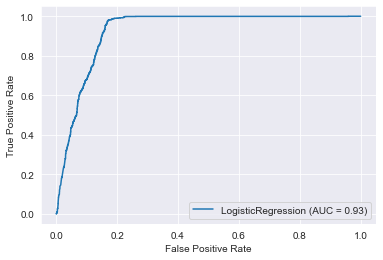

roc-auc = 0.9272
accuracy = 0.876
f1-score = 0.8593


In [12]:
#LogisticRegression


warnings.filterwarnings("ignore")
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
log_reg = LogisticRegression(random_state=0, max_iter=500, class_weight='balanced')
log_reg_grid = GridSearchCV(log_reg, parameters, cv=5, scoring='f1')
log_reg_grid.fit(X_train, y_train)

metrics(clf=log_reg_grid.best_estimator_, X_test=X_test, y_test=y_test)

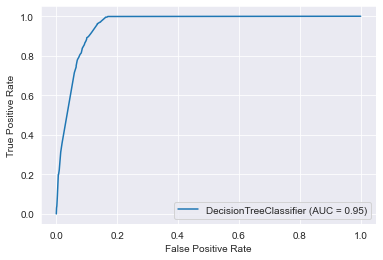

roc-auc = 0.9547
accuracy = 0.9038
f1-score = 0.8912


In [13]:
#Tree


parameters = {'max_depth': range(1, 12), 'min_samples_split': range(1, 10), 'min_samples_leaf': range(1, 10)}
tree = DecisionTreeClassifier()
tree_grid = GridSearchCV(tree, param_grid=parameters, cv=3, n_jobs=-1)
tree_grid.fit(X_train, y_train)

metrics(clf=tree_grid.best_estimator_, X_test=X_test, y_test=y_test)

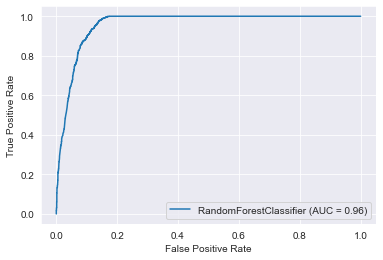

roc-auc = 0.9586
accuracy = 0.9056
f1-score = 0.8935


In [14]:
#RandomForest


parameters = {'max_depth': range(1, 12, 2), 'n_estimators': range(10, 50, 10), 'min_samples_split': range(2, 9, 2), 'min_samples_leaf': range(1, 7)}
forest = RandomForestClassifier()
forest_grid = GridSearchCV(forest, param_grid=parameters, cv=3, n_jobs=-1)
forest_grid.fit(X_train, y_train)

metrics(clf=forest_grid.best_estimator_, X_test=X_test, y_test=y_test)

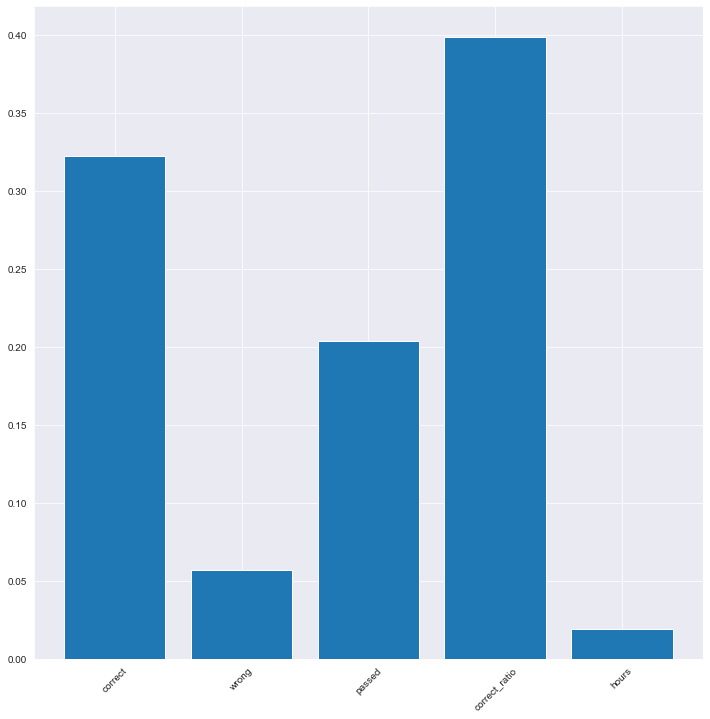

In [15]:
# создаем диаграмму, где ось x - это признак, а Y указывает значимость каждого признака
plt.figure(figsize=(12,12))
plt.bar(X.columns, forest_grid.best_estimator_.feature_importances_)
plt.xticks(rotation=45)


plt.show()

In [16]:
forest_grid.best_estimator_

RandomForestClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=20)

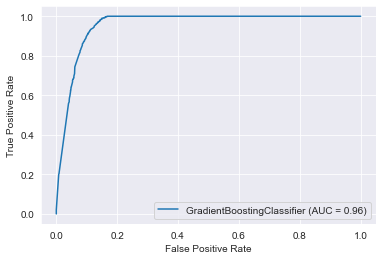

roc-auc = 0.9561
accuracy = 0.9072
f1-score = 0.8969


In [17]:
#GradientBoosting


parameters = {'n_estimators': range(100, 300, 20),
             'max_depth': range(2, 10, 2),
             'criterion': ['friedman_mse', 'squared_error'],
             'learning_rate': np.arange(0.01, 0.04, 0.005),
             'min_samples_leaf': range(2, 10, 3),
             'min_samples_split': range(2, 10, 3),
             'random_state': [0]}
grad_boost = GradientBoostingClassifier()
grad_boost_grid = RandomizedSearchCV(grad_boost, param_distributions=parameters, cv=3, n_jobs=-1)
grad_boost_grid.fit(X_train, y_train)

metrics(clf=grad_boost_grid.best_estimator_, X_test=X_test, y_test=y_test)

In [18]:
grad_boost_grid.best_params_

{'random_state': 0,
 'n_estimators': 280,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_depth': 2,
 'learning_rate': 0.015,
 'criterion': 'friedman_mse'}